# Random Subsampling Analysis – 30 Interferometer Positions

This notebook evaluates the impact of subsampling on the reconstructed nano-FTIR interferograms and spectra.

---

## 1. Objective

Simulate subsampling to investigate the minimum number of interferometer positions needed to achieve reliable reconstruction of hyperspectral data while significantly reducing measurement time.

## 2. Load Data

Load the full interferogram dataset and associated metadata.

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.fftpack import fft, fftfreq, rfft, ifft, fft2
from scipy.io import loadmat
from scipy.stats import kde
from matplotlib import colors
from scipy.signal import blackman


In [4]:
spacialsmoothed1 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_03.11.2020_09.01.09.mat ') 
Reko1=spacialsmoothed1["RekoCSspatialsmoothed"]
spacialsmoothed2 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_03.11.2020_09.08.48.mat ') 
Reko2=spacialsmoothed2["RekoCSspatialsmoothed"]
spacialsmoothed3 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_03.11.2020_09.15.40.mat ') 
Reko3=spacialsmoothed3["RekoCSspatialsmoothed"]
spacialsmoothed4 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_03.11.2020_09.22.38.mat ') 
Reko4=spacialsmoothed4["RekoCSspatialsmoothed"]
spacialsmoothed5 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_03.11.2020_09.29.22.mat ') 
Reko5=spacialsmoothed5["RekoCSspatialsmoothed"]
spacialsmoothed6 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_03.11.2020_09.36.11.mat ') 
Reko6=spacialsmoothed6["RekoCSspatialsmoothed"]
spacialsmoothed7 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\Results\\data_RekoCSspatialsmoothed_03.11.2020_09.45.04.mat ') 
Reko7=spacialsmoothed7["RekoCSspatialsmoothed"]
spacialsmoothed8 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_03.11.2020_09.53.40.mat ') 
Reko8=spacialsmoothed8["RekoCSspatialsmoothed"]
spacialsmoothed9 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_03.11.2020_10.00.30.mat ') 
Reko9=spacialsmoothed9["RekoCSspatialsmoothed"]
spacialsmoothed10 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_03.11.2020_10.07.31.mat ') 
Reko10=spacialsmoothed10["RekoCSspatialsmoothed"]
spacialsmoothed11 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_03.11.2020_10.15.13.mat ') 
Reko11=spacialsmoothed11["RekoCSspatialsmoothed"]
spacialsmoothed12 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_03.11.2020_10.21.55.mat ') 
Reko12=spacialsmoothed12["RekoCSspatialsmoothed"]
spacialsmoothed13 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_03.11.2020_10.29.39.mat ') 
Reko13=spacialsmoothed13["RekoCSspatialsmoothed"]
spacialsmoothed14 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_03.11.2020_10.36.25.mat ') 
Reko14=spacialsmoothed14["RekoCSspatialsmoothed"]
spacialsmoothed15 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_03.11.2020_10.43.14.mat ') 
Reko15=spacialsmoothed15["RekoCSspatialsmoothed"]
spacialsmoothed16 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_03.11.2020_10.49.53.mat ') 
Reko16=spacialsmoothed16["RekoCSspatialsmoothed"]
spacialsmoothed17 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_03.11.2020_10.57.15.mat ') 
Reko17=spacialsmoothed17["RekoCSspatialsmoothed"]
spacialsmoothed18 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_03.11.2020_11.08.18.mat ') 
Reko18=spacialsmoothed18["RekoCSspatialsmoothed"]
spacialsmoothed19 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_03.11.2020_11.15.28.mat ') 
Reko19=spacialsmoothed19["RekoCSspatialsmoothed"]
spacialsmoothed20 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_03.11.2020_11.22.12.mat ') 
Reko20=spacialsmoothed20["RekoCSspatialsmoothed"]
#Reko=spacialsmoothed["RekoCS"]
print(Reko1.shape)


(55, 55, 400)


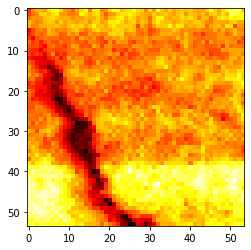

In [8]:
zweiD = np.zeros((54,54))
for i in range (0,54):
    for j in range (0,54):
        zweiD[i,j]= abs(Reko1[i,j,200])  
plt.imshow(zweiD, cmap='hot', interpolation='none')
plt.show()



In [53]:
'''0.42323 + 0.49755 Cos[Pi*(i - resE/2)/(resE/2)] + 
 0.07922 Cos[Pi*2*(i - resE/2)/(resE/2)],'''

def Filter(Filtertype, Resolution): #Resolution=Length complex data
    if Filtertype==1: #blackmann-Harris-3-Term
        b=np.zeros(400*3)
        Filtered=np.zeros(400*3)
        for z in range (199):
            b[z]=np.cos(np.pi*(z)/(Resolution/2))
            Filtered [z]= 0.42323 + 0.49755*b[z] + 0.07922*np.cos(2*np.pi*(z)/(Resolution/2))  
            #b[z]=np.cos(np.pi*(z-Resolution/2))/(Resolution/2))
            #Filtered [z]= 0.42323 + 0.49755*b[z] + 0.07922*np.cos(2*np.pi*(z-Resolution/2))/(Resolution/2)) 
        for z in range (200,400):
            b[z+800]=np.cos(np.pi*(z)/(Resolution/2))
            Filtered [z+800]= 0.42323 + 0.49755*b[z+800] + 0.07922*np.cos(2*np.pi*(z+800)/(Resolution/2))  
        
        return Filtered
    if filtertype==2: #blackmann with gap
        gap = 0.4
        return blackManFn(z/Resolution, gap)

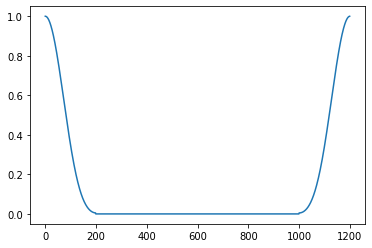

In [54]:
plt.plot(Filter(1,400))

In [55]:
def blackManFn(x, gap):
    if x >=gap and x <= (1 - gap):
        a=np.pi*((x - gap)*(0.5/(-gap + 0.5)) - 1/2)/(1/2)
        b=0.42323 + 0.49755*np.cos(a) + 0.07922*np.cos(2*a)
        return b
    if   x <=  gap or x >= 1 - gap:
        return 0.0049


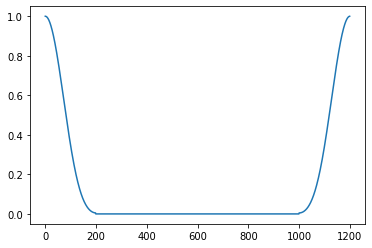

In [56]:
plt.plot(Filter(1,400))
#plt.plot( Filter(1,400*zerofilling))

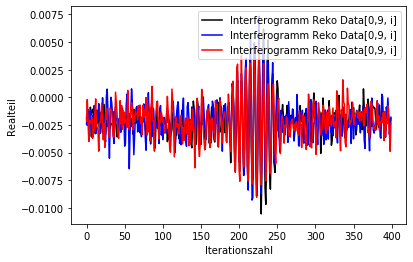

In [57]:
plt.plot(np.real(Reko1[0,9]), 'k-',label='Interferogramm Reko Data[0,9, i]')
plt.plot(np.real(Reko2[0,9]), 'b-',label='Interferogramm Reko Data[0,9, i]')
plt.plot(np.real(Reko3[0,9]), 'r-',label='Interferogramm Reko Data[0,9, i]')

plt.legend()

#plt.axis([0.00115, 0.0013, 0,0.20 ])
plt.xlabel('Iterationszahl')
plt.ylabel('Realteil')

plt.show() 

In [58]:
SNR1=np.zeros((20),dtype=complex)
SNR2=np.zeros((20),dtype=complex)

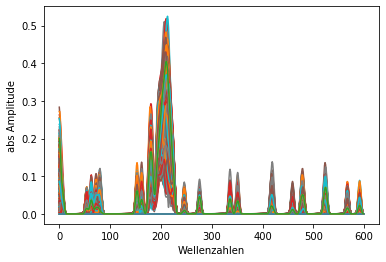

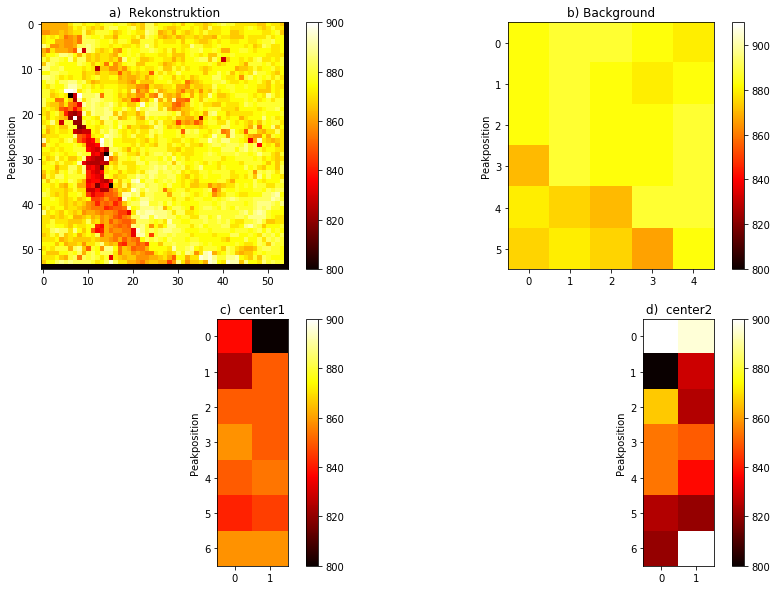

In [66]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))
'''wnZFVals = 
  Table[(j - 
      1)*1/(2*(zerofilling + 1)*
       importDataScanS/10000.), {j, (zerofilling + 1)*dimDat[[2]]}];'''
wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko1[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        #print(offsetReko1)
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        #print(np.subtract(RekoA,-offsetReko)) 
        #plt.plot (np.real(offReko))
        offRekozerofilling= np.concatenate([offReko,zerof])
        #print(offRekozerofilling)
        #plt.plot (np.real(offRekozerofilling))
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #print (wrapReko)
        #plt.plot (np.real(wrapReko))
        plt.plot(np.zeros(600))
        #filtering
        filReko = Filter(1,400)*wrapReko
        #print(filReko)
        #plt.plot(np.absolute(filReko))
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]
plt.plot(np.absolute(ftRekohalve))

#plt.axis([1000, 1199, -0.008,0.007 ])
plt.xlabel('Wellenzahlen')
plt.ylabel('abs Amplitude')
#pos zwischen 800 und 900 wnVal

plt.subplots_adjust(wspace=0.5,hspace=0.5)

plt.figure(figsize=(14,10))

RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()


plt.subplot(221)
plt.imshow(pos_Reko_Max,vmin=800, vmax=900, cmap='hot', interpolation='none')
plt.title('a)  Rekonstruktion')
#plt.legend()
plt.xlabel(' ')
plt.ylabel('Peakposition')
plt.colorbar()

plt.subplot(222) 
plt.imshow(posback1Reko,vmin=800, vmax=910, cmap='hot', interpolation='none') #vmin=750, vmax=900
plt.title('b) Background')
#plt.legend()
plt.xlabel('')
plt.ylabel('Peakposition')
plt.colorbar()

plt.subplot(223)
plt.imshow(RekoA,vmin=800, vmax=900, cmap='hot', interpolation='none')
plt.title('c)  center1')
#plt.legend()
plt.xlabel(' ')
plt.ylabel('Peakposition')
plt.colorbar()
plt.subplot(224)
plt.imshow(RekoA2,vmin=800, vmax=900, cmap='hot', interpolation='none')
plt.title('d)  center2')
#plt.legend()
plt.xlabel(' ')
plt.ylabel('Peakposition')
plt.colorbar()
#plt.savefig("E3Indent_Peakposition.pdf")

NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[0]=SNRposReko
SNR2[0]=SNRposReko2

In [67]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko2[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[1]=SNRposReko
SNR2[1]=SNRposReko2



In [68]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit

for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko3[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[2]=SNRposReko
SNR2[2]=SNRposReko2



In [69]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko4[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[3]=SNRposReko
SNR2[3]=SNRposReko2



In [70]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko5[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[4]=SNRposReko
SNR2[4]=SNRposReko2



In [71]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko6[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[5]=SNRposReko
SNR2[5]=SNRposReko2



In [72]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko7[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[6]=SNRposReko
SNR2[6]=SNRposReko2



In [73]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko8[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[7]=SNRposReko
SNR2[7]=SNRposReko2



In [74]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko9[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[8]=SNRposReko
SNR2[8]=SNRposReko2



In [75]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko10[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[9]=SNRposReko
SNR2[9]=SNRposReko2



In [76]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko11[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[10]=SNRposReko
SNR2[10]=SNRposReko2



In [77]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko12[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[11]=SNRposReko
SNR2[11]=SNRposReko2



In [78]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko13[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[12]=SNRposReko
SNR2[12]=SNRposReko2



In [79]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko14[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[13]=SNRposReko
SNR2[13]=SNRposReko2



In [80]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko15[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[14]=SNRposReko
SNR2[14]=SNRposReko2



In [81]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko16[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[15]=SNRposReko
SNR2[15]=SNRposReko2



In [82]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko17[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[16]=SNRposReko
SNR2[16]=SNRposReko2



In [83]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko18[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[17]=SNRposReko
SNR2[17]=SNRposReko2



In [84]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko19[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[18]=SNRposReko
SNR2[18]=SNRposReko2



In [85]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))

wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko20[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        offRekozerofilling= np.concatenate([offReko,zerof])
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #plt.plot(np.zeros(600))
        filReko = Filter(1,400)*wrapReko
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        #plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]




RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()





NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

SNR1[19]=SNRposReko
SNR2[19]=SNRposReko2



In [86]:
print( 'center position 1' )

print (SNR1  )
print('is SNR of pos(max(Reko))' )
print( 'center position 2' )

print ( SNR2 )
print('is SNR of pos(max(Reko))' )

np.save('SNR30_1', SNR1)
np.save('SNR30_2', SNR2)

center position 1
[0.42976683+0.j 1.93160006+0.j 2.11136727+0.j 2.94635046+0.j
 3.43628315+0.j 4.52659099+0.j 3.25068843+0.j 2.56918441+0.j
 3.57888443+0.j 2.35673714+0.j 2.36299909+0.j 3.05017438+0.j
 2.3009244 +0.j 2.84670736+0.j 1.53922825+0.j 3.49426964+0.j
 4.44783699+0.j 3.578747  +0.j 1.87006013+0.j 3.00966031+0.j]
is SNR of pos(max(Reko))
center position 2
[0.93276099+0.j 1.3602908 +0.j 1.27098327+0.j 0.59789538+0.j
 0.70254004+0.j 0.42500695+0.j 1.87539209+0.j 1.38176461+0.j
 0.9638159 +0.j 0.34871684+0.j 0.7049423 +0.j 0.73742352+0.j
 0.34193959+0.j 0.60916303+0.j 0.17502199+0.j 0.6084747 +0.j
 1.40756715+0.j 0.86478369+0.j 1.14276939+0.j 0.72627656+0.j]
is SNR of pos(max(Reko))


In [87]:
print (np.mean(SNR1),'is Mean of SNR1 with a standard deviation of', np.std(SNR1)/(np.sqrt(20)))

print (np.mean(SNR2),'is Mean of SNR2 with a standard deviation of', np.std(SNR2)/(np.sqrt(20)))


(2.7819030353764145+0j) is Mean of SNR1 with a standard deviation of 0.21280066236608167
(0.858876438998351+0j) is Mean of SNR2 with a standard deviation of 0.09464608735811647


## 6. Results and Conclusion

- Subsampling retains large-scale spectral features.
- Signal-to-Noise Ratio (SNR) trends depend on the sampling percentage and spatial signal region.
- Broader features are preserved better; narrow crack features are more sensitive to undersampling.

Results suggest an optimal trade-off between acquisition speed and spectral reconstruction fidelity depending on the target feature resolution.
